In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [9]:
def _ode(Z: np.complex128, a: float, w: float):
    return Z * (a + 1j * w - np.abs(Z) ** 2)

In [41]:
dt = 1e-4
times = np.arange(0, 2, dt)
Npoints = len(times)

Z = dt * np.random.uniform(size=Npoints) + 1j * dt * np.random.uniform(size=Npoints)

In [43]:
for t in tqdm(range(Npoints - 1)):
    Z[t + 1] = Z[t] + dt * _ode(Z[t], -1.0, np.pi * 2 * 40)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19999/19999 [00:00<00:00, 184091.59it/s]


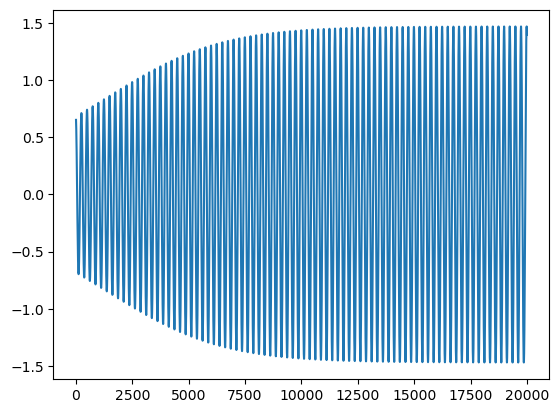

In [44]:
plt.plot(Z.real)

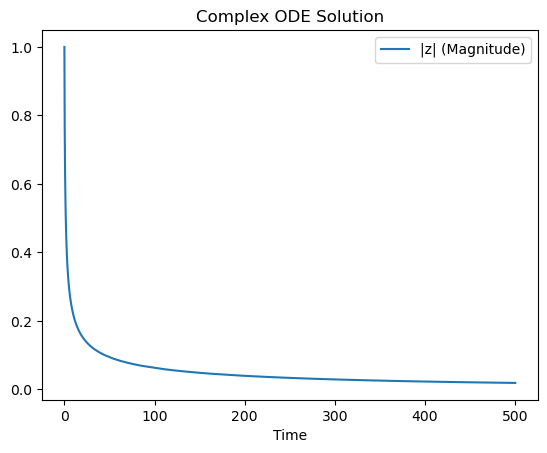

In [56]:
import numpy as np
from scipy.integrate import solve_ivp

# Parameters
a = 0
omega = 2 * np.pi * 40
I = 0  # External forcing term

# Define the ODE
def complex_ode(t, z):
    z = z[0] + 1j * z[1]  # Convert back to complex
    dzdt = (a + 1j * omega) * z - abs(z)**2 * z + I
    return [dzdt.real, dzdt.imag]  # Return real and imaginary parts separately

# Initial condition (complex to real)
z0 = [1.0, 0.0]  # z0 = 1 + 0j

# Time range
t_span = (0, 500)
t_eval = np.linspace(*t_span, 10000)  # Dense output

# Solve using RK45 (adaptive step-size)
sol = solve_ivp(complex_ode, t_span, z0, t_eval=t_eval, method='RK45')

# Convert back to complex form
z_solution = sol.y[0] + 1j * sol.y[1]

# Plot results
import matplotlib.pyplot as plt

plt.plot(sol.t, np.abs(z_solution), label="|z| (Magnitude)")
plt.xlabel("Time")
plt.legend()
plt.title("Complex ODE Solution")
plt.show()


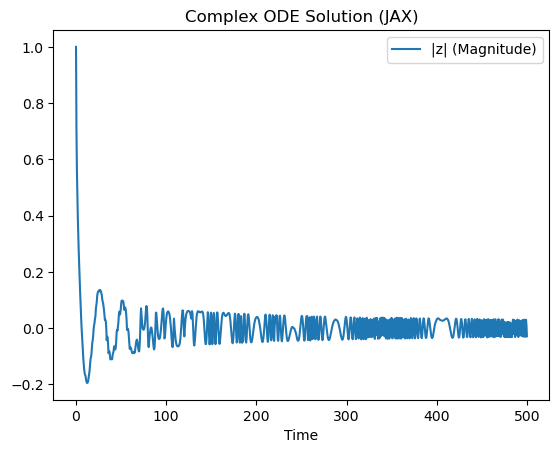

In [54]:
import jax.numpy as jnp
from jax import jit
from jax.experimental.ode import odeint
import matplotlib.pyplot as plt

# Parameters
a = 0
omega = 2 * np.pi * 40
I = 0  # External forcing

# Define the ODE function
def complex_ode(z, t, a, omega, I):
    dzdt = (a + 1j * omega) * z - jnp.abs(z)**2 * z + I
    return dzdt

# Convert complex ODE to real-valued system for JAX compatibility
def real_ode(z_real_imag, t, a, omega, I):
    z = z_real_imag[0] + 1j * z_real_imag[1]  # Convert to complex
    dzdt = complex_ode(z, t, a, omega, I)
    return jnp.array([dzdt.real, dzdt.imag])  # Return real and imaginary parts

# Initial condition (z0 = 1 + 0j)
z0 = jnp.array([1.0, 0.0])

# Time points
t = jnp.linspace(0, 500, 1000)

# Solve ODE using JAX
sol = odeint(real_ode, z0, t, a, omega, I)

# Convert back to complex
z_solution = sol[:, 0] + 1j * sol[:, 1]

# Plot results
plt.plot(t, jnp.real(z_solution), label="|z| (Magnitude)")
plt.xlabel("Time")
plt.legend()
plt.title("Complex ODE Solution (JAX)")
plt.show()
